# Multiple Linear Regression

## Exploring dataset from sklearn

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
cali_housing = fetch_california_housing()

In [3]:
cali_housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [4]:
cali_housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
print(cali_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:
## Independent features
cali_housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [7]:
## Dependent feature
cali_housing.target_names

['MedHouseVal']

In [8]:
## Data
cali_housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]], shape=(20640, 8))

In [9]:
cali_housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,))

## Building DataFrame

In [10]:
dataset = pd.DataFrame(cali_housing.data, columns=cali_housing.feature_names)

In [11]:
## Independent features
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
## Add dependent feature
dataset['Price'] = cali_housing.target

In [13]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<Axes: >

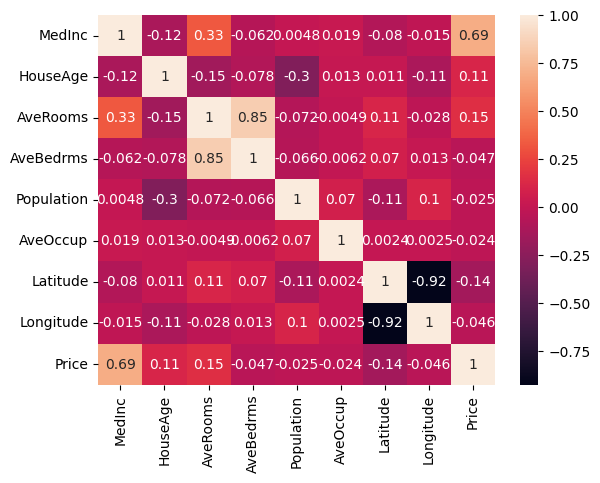

In [14]:
## Visual correlation
sns.heatmap(dataset.corr(), annot=True)

In [15]:
## Seperating Independent and Dependent features
X = dataset.iloc[:,:-1]
y = dataset['Price']

## Model Training

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=10)

In [17]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [18]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
regression.coef_, regression.intercept_

(array([ 0.82872299,  0.1231163 , -0.27068752,  0.32859106,  0.00213572,
        -0.02810091, -0.93017985, -0.89505497]),
 np.float64(2.0634768086491184))

In [20]:
y_pred = regression.predict(X_test)

## Performance of Model

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(y_true=y_test, y_pred=y_pred))
print(mean_absolute_error(y_true=y_test, y_pred=y_pred))
print(np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred)))

0.5522332399363619
0.5371056943007961
0.7431239734636219


In [22]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred) * 100
print(score,"% Accuracy")


59.3595852643664 % Accuracy


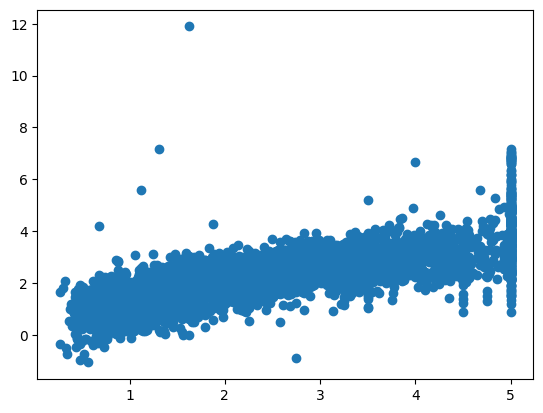

In [28]:
plt.scatter(y_test, y_pred)

In [23]:
residuals = y_test-y_pred

In [24]:
residuals

20303   -1.329975
16966    0.960885
10623   -0.746908
6146    -0.307462
2208    -0.662167
           ...   
13490   -0.243475
9340     0.507182
17439   -1.366037
2602     0.046480
7180    -0.627770
Name: Price, Length: 6812, dtype: float64

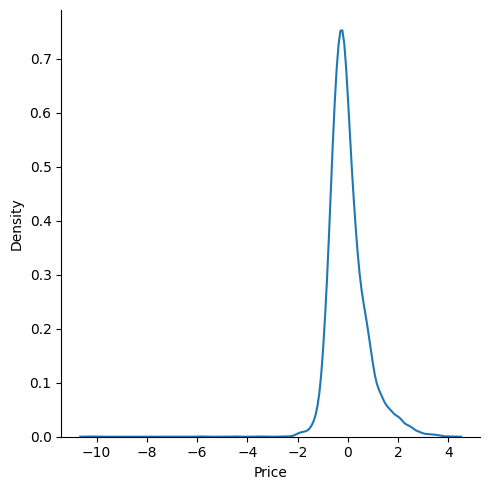

In [25]:
sns.displot(kind='kde',data=residuals)

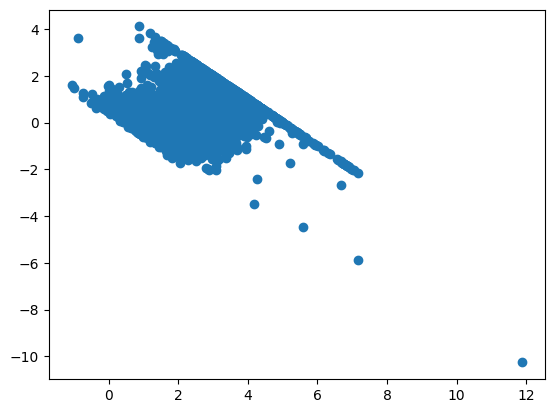

In [29]:
plt.scatter(y_pred, residuals)

## Pickling 
Python pickle module is used for serialising and de-serialising a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serialises” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

In [30]:
import pickle

In [38]:
pickle.dump(regression, open('regression.pkl', 'wb'))

In [ ]:
model = pickle.load(open('regression.pkl', 'rb'))
pred = model.predict(X_test)
pred   

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012], shape=(6812,))